In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# use_python("/data8t_0/hms/anaconda3/envs/pyr2/bin/python")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
suppressMessages(suppressWarnings(library(stringr)))
suppressMessages(suppressWarnings(library(dplyr)))
datasetName = "oesophagus_oesophagus_Madissoon2019"
dataFormat = 'tsv'
setwd(paste0("/stor/public/hcad/db_v1/",datasetName,"/"))

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
dataobj = readRDS('oesophagus_ts.rds')

In [4]:
dataobj

An object of class Seurat 
24245 features across 87947 samples within 1 assay 
Active assay: RNA (24245 features, 0 variable features)
 2 dimensional reductions calculated: pca, umap

In [5]:
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

In [6]:
dataobj <- AddMetaData(dataobj, metadata = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
dataobj

An object of class Seurat 
24245 features across 87947 samples within 1 assay 
Active assay: RNA (24245 features, 0 variable features)
 2 dimensional reductions calculated: pca, umap

In [7]:
dataobj@meta.data

,Donor,Time,donor_time,organ,patient,sample,n_genes,percent_mito,n_counts,leiden,Celltypes_GenomeBiol_2019,Celltypes_updated_July_2020,region,subregion,sample_status,donor_ID,donor_gender,donor_age,cell_cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<lgl>,<fct>
AAACCTGAGAAGGTTT-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,1976,0.04382791,9948,2,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACCTGAGAGTCTGG-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,1960,0.05755929,8096,4,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACCTGAGCCCAATT-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,1598,0.05426357,5805,0,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACCTGCATGCCCGA-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,1805,0.04590690,9345,2,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACCTGTCGAACGGA-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,311,0.04310345,580,9,T_CD4,T_CD4,mid-region,NA,normal,328C,NA,NA,T_CD4
AAACGGGAGACCGGAT-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,2184,0.07318536,11669,2,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACGGGAGCGCTTAT-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,2060,0.04663390,8749,4,Epi_stratified,Epi_stratified,mid-region,NA,normal,328C,NA,NA,Epi_stratified
AAACGGGAGCTCCCAG-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,2543,0.05651359,10670,1,Epi_dividing,Epi_suprabasal,mid-region,NA,normal,328C,NA,NA,Epi_dividing
AAACGGGCAACGCACC-1-HCATisStab7413619,328C,0h,328C_0h,Oesophagus,328C,HCATisStab7413619,1687,0.05699746,5895,3,Epi_suprabasal,Epi_basal,mid-region,NA,normal,328C,NA,NA,Epi_suprabasal


In [8]:
# Pre-processing
min.features = 20
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = dataobj@assays$RNA@counts, project = datasetName, min.features = min.features, meta.data = dataobj@meta.data)
# dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}
# dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
# VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [9]:
warnings('off')
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)

In [10]:
dataobj@meta.data$cell_ID = rownames(dataobj@meta.data)

In [12]:
cellnames <- rownames(dataobj@meta.data)
for (i in 1:(length(cellnames)%/%15000 + 1)){
    print('divide')
    obj <- subset(dataobj, subset =  cell_ID %in% cellnames[(1+15000*(i-1)):min(15000*i,length(cellnames))])
    print(i)
    dm <- datapro(obj)
    if (i == 1){
        dataobj2 = CreateSeuratObject(counts = dm, min.cells=0)}
    else{
        obj <- CreateSeuratObject(counts = dm, min.cells=0)
        dataobj2 <- merge(dataobj2, obj)}
    rm(dm)
    rm(obj)
}
dataobj2 <- AddMetaData(dataobj2, metadata = dataobj@meta.data)
saveRDS(dataobj2, file = paste0(datasetName,".good43878.rds"))

[1] "divide"
[1] 1
[1] "=========Loading Reference Table========="
[1] "Finished"
[1] "=========Processing Gene List========="
[1] "The length of gene list is: "
[1] 43878
[1] "Finished"
[1] "=========Processing Reference Table========="
[1] "Finished"
[1] "=========Loading Query Data========="
[1] "The shape of query data is: "
[1] 24245 15000
[1] "Print out first 5 genes in query data, in case something wrong happens in data loading: "
[1] "RP11-34P13.7"  "RP11-34P13.9"  "FO538757.2"    "AP006222.2"   
[5] "RP5-857K21.15"
[1] "Finished"
[1] "=========Performing Gene Symbol Uniform========="
[1] "Performing gene symbol uniform, this step may take several minutes"
[1] "Finished"
[1] "=========Building Output Matrix========="
[1] "Shape of processed query data: "
[1] 18314 15000
[1] "Shape of output data after adding zero-value genes. It should have 43878 genes with cell number unchanged."
[1] 43878 15000
[1] "Finished"
[1] "divide"
[1] 2
[1] "=========Loading Reference Table========="


In [ ]:
dataobj2 <- AddMetaData(dataobj2, metadata = dataobj@meta.data)
saveRDS(dataobj2, file = paste0(datasetName,".good43878.rds"))

In [11]:
datapro <- function(dataobj){
# *--------------------Load reference table--------------------*
print("=========Loading Reference Table=========")
ref_table_raw <- read.csv("/data8t_0/hms/workspace/HCA-d/Rtoolkit_GeneSymbolUniform/GeneSymbolRef_SelectAll_upd0731.csv", header=TRUE, na.strings=TRUE, stringsAsFactors=FALSE)
# print(dim(ref_table_raw))
print("Finished")
# *--------------------Load total gene list--------------------*
print("=========Processing Gene List=========")
total_gene_list_raw = read.table("/data8t_0/hms/workspace/HCA-d/Rtoolkit_GeneSymbolUniform/total_gene_list_43878.txt", 
                                 header=TRUE, sep='\t', fill=TRUE, stringsAsFactors=FALSE)
total_gene_list = total_gene_list_raw[,1]
# Seurat changes all "_" to "-".
total_gene_list <- str_replace(total_gene_list, "_", "-")
print("The length of gene list is: ")
print(length(total_gene_list))
print("Finished")
print("=========Processing Reference Table=========")
# Separate dataframe to previous and alias symbol sub-dataframe
# Remove duplicates and empty values
ref_table_raw <- ref_table_raw[,c("Approved.symbol","Alias.symbol","Previous.symbol")]
ref_table <- ref_table_raw[ref_table_raw[,"Previous.symbol"]!="" | ref_table_raw[,"Alias.symbol"]!="",]
# Seurat changes all "_" to "-".
ref_table$Previous.symbol <- str_replace(ref_table$Previous.symbol, "_", "-")
ref_table$Alias.symbol <- str_replace(ref_table$Alias.symbol, "_", "-")
ref_table$Approved.symbol <- str_replace(ref_table$Approved.symbol, "_", "-")
# print(dim(ref_table))
ref_table_prev <- unique(ref_table[,c("Approved.symbol","Previous.symbol")])
ref_table_prev <- ref_table_prev[ref_table_prev[,"Previous.symbol"]!="",]
ref_table_alia <- unique(ref_table[,c("Approved.symbol","Alias.symbol")])
ref_table_alia <- ref_table_alia[ref_table_alia[,"Alias.symbol"]!="",]
# print(dim(ref_table_prev))
# print(dim(ref_table_alia))
print("Finished")

# *--------------------Load query data--------------------*
print("=========Loading Query Data=========")
query_data <- as.data.frame(as.matrix(dataobj@assays$RNA@data))
query_gene_list <- rownames(dataobj)
print("The shape of query data is: ")
print(dim(query_data))
print("Print out first 5 genes in query data, in case something wrong happens in data loading: ")
print(query_gene_list[1:5])
print("Finished")

# *--------------------Perform gene name uniform--------------------*
print("=========Performing Gene Symbol Uniform=========")
print("Performing gene symbol uniform, this step may take several minutes")
gene_appearance_list <- data.frame(gene_name=total_gene_list, appearance=rep(FALSE, length(total_gene_list)))
outlier_gene_list <- c()

result_data <- query_data
result_data$genenames <- rownames(result_data)
report <- data.frame(Original.Name=character(), Modified.Name=character(), Status=character(), stringsAsFactors=FALSE)

for (i in c(1:length(query_gene_list))){
  gene_name <- query_gene_list[i]
  # Modify gene symbols, both "Alias symbol" and "Previous symbol" are used. 
  if(sum(ref_table_prev["Previous.symbol"]==gene_name)>0){
    # Multiple names matched
    if(sum(ref_table_prev["Previous.symbol"]==gene_name)>1){
      candidate_names <- paste(ref_table_prev[ref_table_prev[,"Previous.symbol"]==gene_name,"Approved.symbol"], collapse='|')
      report[i,] <- c(gene_name, candidate_names, "Multiple Candidates")
      if(gene_name %in% total_gene_list){
        gene_appearance_list[gene_appearance_list[,"gene_name"]==gene_name,"appearance"] = TRUE
      }
      else{
        outlier_gene_list <- c(outlier_gene_list, gene_name)
      }
    }
    # Only one name matched
    else{
      candidate_names <- ref_table_prev[ref_table_prev[,"Previous.symbol"]==gene_name,"Approved.symbol"]
      result_data[i:dim(result_data)[1],"genenames"][result_data[i:dim(result_data)[1],"genenames"]==gene_name] <- candidate_names
      report[i,] <- c(gene_name, candidate_names, "Changed")
      if(candidate_names %in% total_gene_list){
        gene_appearance_list[gene_appearance_list[,"gene_name"]==candidate_names,"appearance"] = TRUE
      }
      else{
        outlier_gene_list <- c(outlier_gene_list, candidate_names)
      }
    }
  }
    
  else if(sum(ref_table_alia["Alias.symbol"]==gene_name)>0){
    # Multiple names matched
    if(sum(ref_table_alia["Alias.symbol"]==gene_name)>1){
      candidate_names <- paste(ref_table_alia[ref_table_alia[,"Alias.symbol"]==gene_name,"Approved.symbol"], collapse='|')
      report[i,] <- c(gene_name, candidate_names, "Multiple Candidates")
      if(gene_name %in% total_gene_list){
        gene_appearance_list[gene_appearance_list[,"gene_name"]==gene_name,"appearance"] = TRUE
      }
      else{
        outlier_gene_list <- c(outlier_gene_list, gene_name)
      }
    }
    # Only one name matched
    else{
      candidate_names <- ref_table_alia[ref_table_alia[,"Alias.symbol"]==gene_name,"Approved.symbol"]
      result_data[i:dim(result_data)[1],"genenames"][result_data[i:dim(result_data)[1],"genenames"]==gene_name] <- candidate_names
      report[i,] <- c(gene_name, candidate_names, "Changed")
      if(candidate_names %in% total_gene_list){
        gene_appearance_list[gene_appearance_list[,"gene_name"]==candidate_names,"appearance"] = TRUE
      }
      else{
        outlier_gene_list <- c(outlier_gene_list, candidate_names)
      }
    }
  }
  
  # Gene name not found
  else{
    report[i,] <- c(gene_name, gene_name, "No Change")
    if(gene_name %in% total_gene_list){
      gene_appearance_list[gene_appearance_list[,"gene_name"]==gene_name,"appearance"] = TRUE
    }
    else{
      outlier_gene_list <- c(outlier_gene_list, gene_name)
    }
  }
}
print("Finished")

# *--------------------Construct uniform output--------------------*
print("=========Building Output Matrix=========")
result_data_grouped <- result_data %>% group_by(genenames) %>% summarise_at(vars(-group_cols()), mean)
result_data_sub <- as.data.frame(result_data_grouped)[which(!result_data_grouped$genenames %in% outlier_gene_list),]
result_data_out <- subset(result_data_sub, select = -genenames )
rownames(result_data_out) <- result_data_sub$genenames
print("Shape of processed query data: ")
print(dim(result_data_out))

add_df <- data.frame(matrix(nrow=sum(gene_appearance_list$appearance==FALSE),ncol=dim(result_data)[2]-1, 0))
rownames(add_df) <- gene_appearance_list$gene_name[!gene_appearance_list$appearance]
colnames(add_df) <- colnames(result_data_out)
result_data_out <- rbind(result_data_out, add_df)
print("Shape of output data after adding zero-value genes. It should have 43878 genes with cell number unchanged.")
print(dim(result_data_out))
print("Finished")
return(result_data_out)
    }
# write.csv(result_data_out, file="UniformedExpression.csv")
# write.csv(report, file="ModificationReport.csv")
# print("=========Output Files Saved!=========")

In [47]:
dataobj2 <- AddMetaData(dataobj2, metadata = dataobj@meta.data)
saveRDS(dataobj2, file = paste0(datasetName,".good43878.rds"))

In [13]:
dataobj = dataobj2
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix



PC_ 1 
Positive:  SPINK5, CSTA, CYSRT1, IL1RN, S100A8, CD24, RHCG, S100A11P1, SPRR3, CRNN 
	   MUC21, ANXA1, SCEL, LYNX1, CLIC3, TGM3, NCCRP1, SLPI, EMP1, ECM1 
	   CNFN, KRT13, MALL, C4orf3, PPL, PRSS27, CRCT1, KLK13, CLCA4, TMPRSS11B 
Negative:  PTMA, B2M, HLA-B, FTL, HLA-A, IFITM3, VIM, CD74, TIMP1, ARPC1B 
	   TSC22D3, LDHB, HLA-DPA1, SRGN, HLA-DRA, TXNIP, IGFBP7, HSP90AA1, FOS, ATP1B3 
	   HLA-DPB1, IGFBP4, SPARCL1, HLA-DRB1, CAV1, LGALS1, CLU, CYBA, KRT15, GNG11 
PC_ 2 
Positive:  S100A2, FABP5P1, KRT5, AQP3, LY6D, SLC25A5, MT1X, DAPL1, TXN, KRT15 
	   PTMA, CRABP2, FGFBP1, MT-CO3, ATP1B3, PTTG1, CALML3, H2AZ1, KRT14, MT-CO2 
	   C10orf99, MT-ND2, LDHB, PHLDA2, CENPW, LGALS7, PCLAF, MT-ND4, ALDH3A1, CKS2 
Negative:  VIM, GNG11, PECAM1, AQP1, IGFBP7, RAMP2, ACKR1, CLDN5, PLVAP, RAMP3 
	   ENG, SPARCL1, CNFN, NNMT, SNCG, PRSS27, TMPRSS11B, ESAM, ECM1, A2M 
	   VWF, NCCRP1, CLEC14A, ADIRF, KRT78, LYPD2, MUC21, JAM2, HOPX, EMCN 
PC_ 3 
Positive:  CXCR4, RGS1, LAPTM5, CD69, CD52, CORO

png 
  2

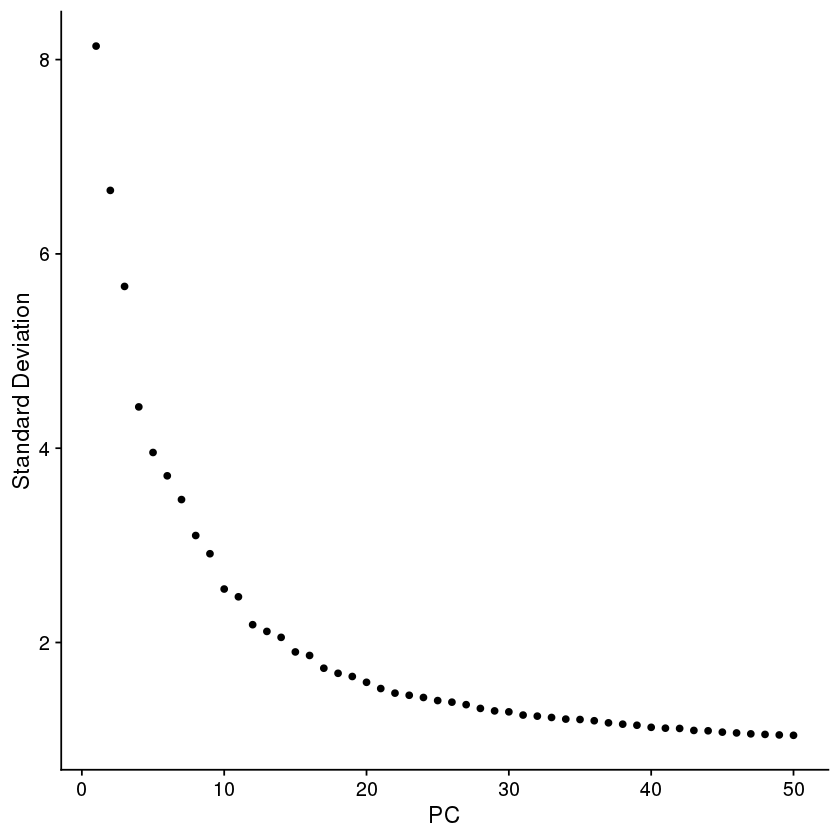

In [14]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [15]:
pcDim = 50 
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [16]:
colnames(dataobj@meta.data)

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "Donor"                      
 [5] "Time"                        "donor_time"                 
 [7] "organ"                       "patient"                    
 [9] "sample"                      "n_genes"                    
[11] "percent_mito"                "n_counts"                   
[13] "leiden"                      "Celltypes_GenomeBiol_2019"  
[15] "Celltypes_updated_July_2020" "region"                     
[17] "subregion"                   "sample_status"              
[19] "donor_ID"                    "donor_gender"               
[21] "donor_age"                   "cell_cluster"               
[23] "cell_ID"

In [24]:
dataobj <- FindClusters(dataobj, resolution = 0.05, n.start = 15)
randIndex(dataobj$Celltypes_updated_July_2020,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 87947
Number of edges: 3582499

Running Louvain algorithm...
Maximum modularity in 15 random starts: 0.9847
Number of communities: 12
Elapsed time: 60 seconds


ARI 
0.08318129

In [20]:
dataobj <- RunUMAP(dataobj,dims=1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:46:09 UMAP embedding parameters a = 0.9922 b = 1.112

16:46:09 Read 87947 rows and found 50 numeric columns

16:46:09 Using Annoy for neighbor search, n_neighbors = 30

16:46:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:46:35 Writing NN index file to temp file /tmp/RtmpE1l0IE/file9f2f6e2a188

16:46:35 Searching Annoy index using 1 thread, search_k = 3000

16:47:13 Annoy recall = 100%

16:47:14 Commencing smooth kNN distance calibration using 1 thread

16:47:20 Initializing fr

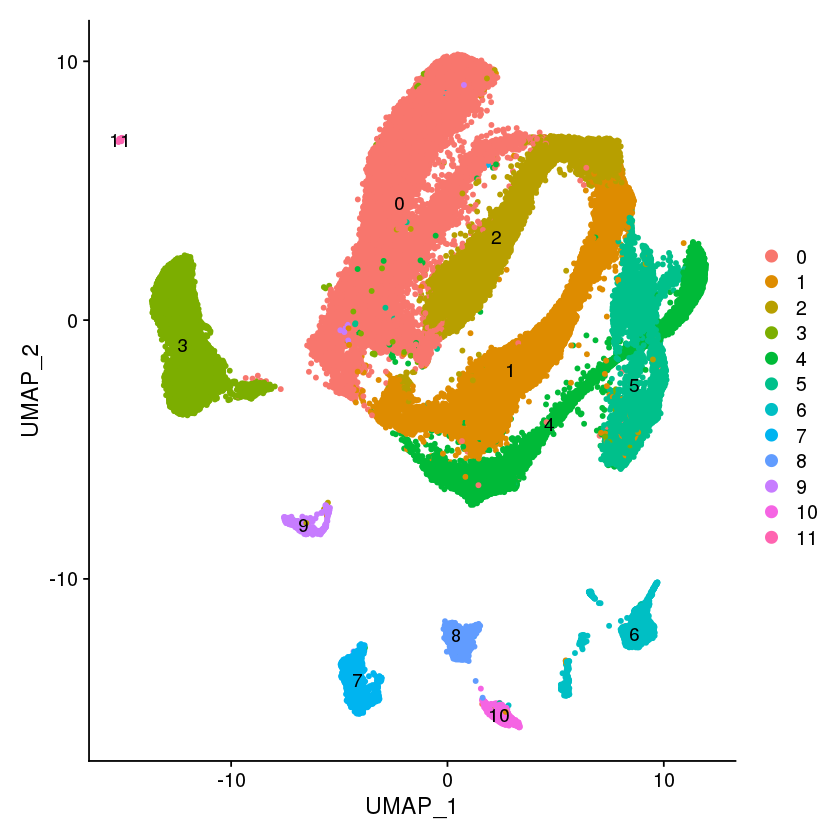

In [25]:
p_umap=DimPlot(dataobj,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.png"), plot = p_umap, width = 8, height = 5)
p_umap

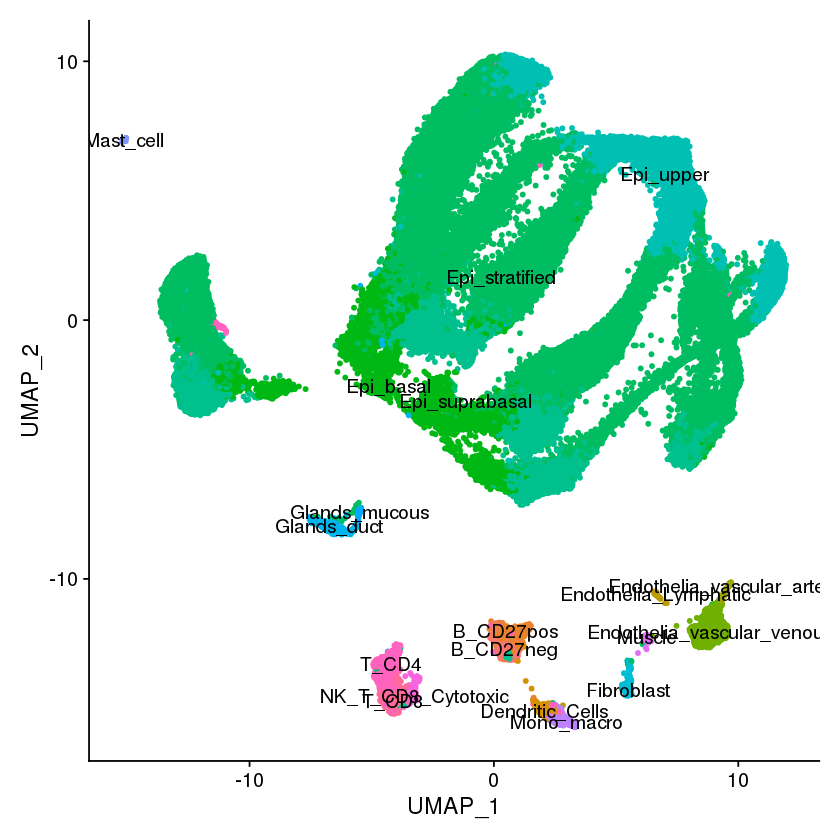

In [23]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = T, group.by = "Celltypes_updated_July_2020", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.png"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [39]:
new.cluster.ids <- c(
                     "Oesophagus-Epithelial tissue-Epithelial cell-AQP3",
                     "Oesophagus-Epithelial tissue-Epithelial cell-KRT15",
                     "Oesophagus-Epithelial tissue-Epithelial cell-IFI27",
                     "Oesophagus-Epithelial tissue-Epithelial cell-HBEGF CXCL8",
                     "Oesophagus-Connective tissue-Dendritic cell-SLURP1",
                     "Oesophagus-Epithelial tissue-Epithelial cell-KRT13",
                     "Oesophagus-Epithelial tissue-Endothelial cell-IGFBP7 ACKR1",
                     "Oesophagus-Connective tissue-T cell-CD3D TRAC",
                     "Oesophagus-Connective tissue-B cell-IGKC HLA-DRA",
                     "Oesophagus-Epithelial tissue-Epithelial cell-KRT15",
                     "Oesophagus-Connective tissue-Dendritic cell-LYZ FTL",
                     "Oesophagus-Connective tissue-Mast cell-TPSB2"
                    )

In [38]:
subset(dataobj.markers,cluster=='11')
# subset(dataobj.markers,gene=='CLCNKB')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
TPSB2,0,5.7115995,1.000,0.001,0,11,TPSB2
TPSAB1,0,5.1459273,1.000,0.001,0,11,TPSAB1
CD692,0,3.6380816,0.940,0.036,0,11,CD69
RGS14,0,3.4205786,0.940,0.036,0,11,RGS1
HPGDS,0,3.2646533,0.897,0.001,0,11,HPGDS
SRGN4,0,3.1293840,0.915,0.047,0,11,SRGN
ALOX5AP3,0,2.8801328,0.880,0.017,0,11,ALOX5AP
FCER1G1,0,2.8471032,0.880,0.011,0,11,FCER1G
SAMSN13,0,2.6249398,0.718,0.010,0,11,SAMSN1


In [40]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [41]:
annodataobj <- RunUMAP(annodataobj,dims=1:pcDim)

19:06:40 UMAP embedding parameters a = 0.9922 b = 1.112

19:06:40 Read 87947 rows and found 50 numeric columns

19:06:40 Using Annoy for neighbor search, n_neighbors = 30

19:06:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

19:07:10 Writing NN index file to temp file /tmp/RtmpE1l0IE/file9f2f7b99c8e2

19:07:10 Searching Annoy index using 1 thread, search_k = 3000

19:07:48 Annoy recall = 100%

19:07:49 Commencing smooth kNN distance calibration using 1 thread

19:07:55 Initializing from normalized Laplacian + noise

19:08:17 Commencing optimization for 200 epochs, with 3950170 positive edges

19:10:35 Optimization finished



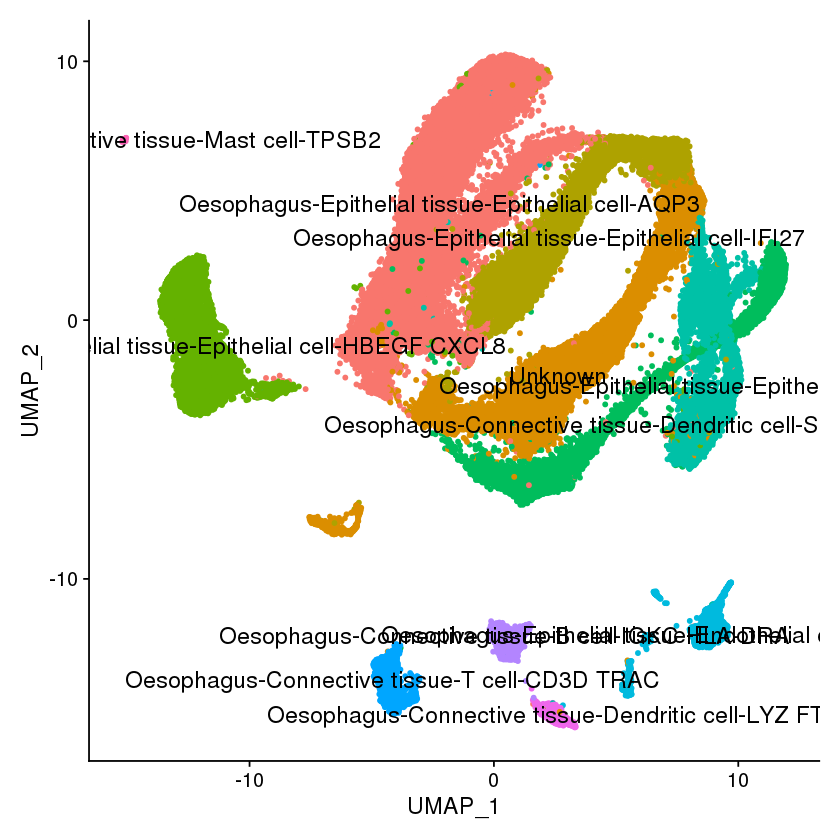

In [42]:
p_umap4 <- UMAPPlot(annodataobj,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.png"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [26]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [43]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [44]:
print(levels(dataobj$sample_status))
dataobj

[1] "normal"


An object of class Seurat 
43878 features across 87947 samples within 1 assay 
Active assay: RNA (43878 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [45]:
# ncol(result_data_out
levels(dataobj$donor_age)  
print(unique(dataobj$region))
print(unique(dataobj$subregion))

NULL

[1] mid-region
Levels: mid-region
[1] NA


In [46]:
colnames(dataobj@meta.data)

[1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "Donor"                      
 [5] "Time"                        "donor_time"                 
 [7] "organ"                       "patient"                    
 [9] "sample"                      "n_genes"                    
[11] "percent_mito"                "n_counts"                   
[13] "leiden"                      "Celltypes_GenomeBiol_2019"  
[15] "Celltypes_updated_July_2020" "region"                     
[17] "subregion"                   "sample_status"              
[19] "donor_ID"                    "donor_gender"               
[21] "donor_age"                   "cell_cluster"               
[23] "cell_ID"                     "RNA_snn_res.0.1"            
[25] "seurat_clusters"             "RNA_snn_res.0.05"           
[27] "RNA_snn_res.0.15"            "hcad.label"

In [47]:
dataobj.dbupload_v1 <- CreateSeuratObject(dataobj@assays$RNA@data)
# dataobj.dbupload_v1 <- NormalizeData(dataobj.dbupload_v1, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj.dbupload_v1[['orig.ident']] <- NULL
dataobj.dbupload_v1[['nCount_RNA']] <- NULL
dataobj.dbupload_v1[['nFeature_RNA']] <- NULL
dataobj.dbupload_v1$user_id <- 1
dataobj.dbupload_v1$study_id<-"10.1186/s13059-019-1906-x"
dataobj.dbupload_v1$cell_id <- colnames(dataobj.dbupload_v1@assays$RNA@data)
dataobj.dbupload_v1$organ<-"Oesophagus"
dataobj.dbupload_v1$region<-"mid"
dataobj.dbupload_v1$subregion<-"NA"
dataobj.dbupload_v1$seq_tech<-"10X"
dataobj.dbupload_v1$sample_status<-"Healthy"
dataobj.dbupload_v1$donor_id<-dataobj$donor_ID
dataobj.dbupload_v1$donor_gender<-dataobj$donor_gender
dataobj.dbupload_v1$donor_age<- dataobj$donor_age
dataobj.dbupload_v1$original_name<-dataobj$cell_cluster
dataobj.dbupload_v1$cl_name<-"NA"
dataobj.dbupload_v1$hcad_name<-dataobj$hcad.label

In [48]:
dataobj.dbupload_v1$original_name<-as.character(dataobj.dbupload_v1$original_name)
dataobj.dbupload_v1$donor_id<-as.character(dataobj.dbupload_v1$donor_id)
dataobj.dbupload_v1$donor_gender<-as.character(dataobj.dbupload_v1$donor_gender)
dataobj.dbupload_v1$donor_age<- sub("Y","yr",dataobj.dbupload_v1$donor_age)

In [5]:
saveRDS(dataobj.dbupload_v1, file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [82]:
print(length(colnames(dataobj.dbupload_v1@meta.data)))
colnames(dataobj.dbupload_v1@meta.data)

[1] 14


[1] "user_id"       "study_id"      "cell_id"       "organ"        
 [5] "region"        "subregion"     "seq_tech"      "sample_status"
 [9] "donor_id"      "donor_gender"  "donor_age"     "original_name"
[13] "cl_name"       "hcad_name"

In [85]:
dataobj.dbupload_v1@assays

$RNA
Assay data with 43878 features for 94257 cells
First 10 features:
 A1BG, A1BG-AS1, A2M, A2M-AS1, A2ML1, A4GALT, AAAS, AACS, AADAT, AAGAB 


In [49]:
head(dataobj.dbupload_v1[[]],3)

,user_id,study_id,cell_id,organ,region,subregion,seq_tech,sample_status,donor_id,donor_gender,donor_age,original_name,cl_name,hcad_name
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCTGAGAAGGTTT-1-HCATisStab7413619,1,10.1186/s13059-019-1906-x,AAACCTGAGAAGGTTT-1-HCATisStab7413619,Oesophagus,mid,NA,10X,Healthy,328C,NA,NA,Epi_stratified,NA,Oesophagus-Epithelial tissue-Epithelial cell-AQP3
AAACCTGAGAGTCTGG-1-HCATisStab7413619,1,10.1186/s13059-019-1906-x,AAACCTGAGAGTCTGG-1-HCATisStab7413619,Oesophagus,mid,NA,10X,Healthy,328C,NA,NA,Epi_stratified,NA,Oesophagus-Epithelial tissue-Epithelial cell-AQP3
AAACCTGAGCCCAATT-1-HCATisStab7413619,1,10.1186/s13059-019-1906-x,AAACCTGAGCCCAATT-1-HCATisStab7413619,Oesophagus,mid,NA,10X,Healthy,328C,NA,NA,Epi_stratified,NA,Oesophagus-Epithelial tissue-Epithelial cell-AQP3


In [3]:
dataobj.dbupload_v1 = readRDS(paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [4]:
dataobj = readRDS(paste0(datasetName,".seuratobj.rds"))